In [51]:
import psycopg2
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
with open('form5500_data/config.json') as f:
    conf = json.load(f)
    host = conf['host']
    database = conf['database']
    user = conf['user']
    passw = conf['passw']
conn_str = "host={} dbname={} user={} password={}".format(host, database, user, passw)
conn = psycopg2.connect(conn_str)

In [3]:
query = '''SELECT sb.SB_EIN AS EIN, sb.SB_PN AS PN, sb.SB_EFF_INT_RATE_PRCNT AS EIR, sb.SB_PLAN_TYPE_CODE,
       sb.SB_TOT_PARTCP_CNT AS PART_CNT_2016, sb.SB_TOT_FNDNG_TGT_AMT AS FNDNG_TGT_2016, 
       sb.SB_TGT_NRML_COST_01_AMT AS TGT_NRML_COST_2016, sb2.SB_TOT_FNDNG_TGT_AMT AS FNDNG_TGT_2017,
       sb2.SB_TOT_PARTCP_CNT AS PART_CNT_2017, 
       f.TYPE_PENSION_BNFT_CODE, f.PLAN_NAME, f.SPONSOR_DFE_NAME,
       h.DISTRIB_DRT_PARTCP_AMT, h.TOT_DISTRIB_BNFT_AMT
       FROM sb_full sb
       LEFT JOIN sb_full sb2
       ON sb.SB_EIN = sb2.SB_EIN AND sb.SB_PN = sb2.SB_PN
       LEFT JOIN f5500_full f
       ON sb.SB_EIN = f.SPONS_DFE_EIN AND sb.SB_PN = f.SPONS_DFE_PN
       LEFT JOIN h_full h
       ON sb.SB_EIN = h.SCH_H_EIN AND sb.SB_PN = h.SCH_H_PN
       WHERE sb.SB_PLAN_TYPE_CODE = '1'
       AND sb.SB_PLAN_YEAR_BEGIN_DATE = '2016-01-01'
       AND sb2.SB_PLAN_YEAR_BEGIN_DATE = '2017-01-01'
       AND h.SCH_H_PLAN_YEAR_BEGIN_DATE = '2016-01-01';
       '''

In [4]:
df = pd.read_sql(query, con=conn)
conn.close()

In [5]:
df

,ein,pn,eir,sb_plan_type_code,part_cnt_2016,fndng_tgt_2016,tgt_nrml_cost_2016,fndng_tgt_2017,part_cnt_2017,type_pension_bnft_code,plan_name,sponsor_dfe_name,distrib_drt_partcp_amt,tot_distrib_bnft_amt
0,560486957,1,6.13,1,120,8762488,388723.0,9572818,127,1A,T. W. GARNER FOOD COMPANY EMPLOYEES' PENSION PLAN,T. W. GARNER FOOD COMPANY,343620.0,343620.0
1,640220550,2,5.91,1,483,23158633,0.0,23584078,480,1A1I,RENASANT BANK AMENDED AND RESTATED PENSION PLAN,RENASANT BANK,2022193.0,2022193.0
2,580254510,1,6.11,1,25631,1588239082,9200000.0,1587936621,23333,1A3H,GENUINE PARTS COMPANY PENSION PLAN,GENUINE PARTS COMPANY,138227658.0,138227658.0
3,251538192,2,6.01,1,207,1298395,103952.0,1512716,229,1A1C1D,BURNS WHITE DEFINED BENEFIT PLAN,BURNS WHITE LLC,15395.0,15395.0
4,510377325,2,6.02,1,803,21312047,260000.0,21003436,634,1A1I,TOWNSENDS COMBINED PENSION PLAN,THE INDIAN RIVER TRUST,1950582.0,1950582.0
5,237211935,2,6.04,1,195,20142543,0.0,20409984,190,1A1F1I,FINANCIAL ACCOUNTING FOUNDATION EMPLOYEES' PEN...,FINANCIAL ACCOUNTING FOUNDATION,1237598.0,1237598.0
6,630363853,1,6.18,1,142,8771228,427192.0,9761419,148,1A1C,LEGACY COMMUNITY FEDERAL CREDIT UNION CASH BAL...,LEGACY COMMUNITY FEDERAL CREDIT UNION,225365.0,225365.0
7,161015782,1,6.00,1,113,10161550,84000.0,10220223,111,1A1I,PENSION PLAN OF UNITED WAY OF GREATER ROCHESTE...,"UNITED WAY OF GREATER ROCHESTER, INC.",720278.0,720278.0
8,363081482,3,6.08,1,135,6468315,859290.0,7917338,142,1A1C,RGA CASH BALANCE PLAN,"ROCKFORD GASTROENTEROLOGY ASSOCIATES, LTD.",64857.0,64857.0
9,522168499,4,6.09,1,224,11044211,0.0,11385755,222,1A3H,AMERICAN PSYCHIATRIC ASSOCIATION PENSION PLAN,AMERICAN PSYCHIATRIC ASSOCIATION,512727.0,512727.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4581 entries, 0 to 4580
Data columns (total 14 columns):
ein                       4581 non-null int64
pn                        4581 non-null int64
eir                       4581 non-null float64
sb_plan_type_code         4581 non-null object
part_cnt_2016             4581 non-null object
fndng_tgt_2016            4581 non-null int64
tgt_nrml_cost_2016        4564 non-null float64
fndng_tgt_2017            4581 non-null int64
part_cnt_2017             4581 non-null object
type_pension_bnft_code    4568 non-null object
plan_name                 4581 non-null object
sponsor_dfe_name          4581 non-null object
distrib_drt_partcp_amt    4568 non-null float64
tot_distrib_bnft_amt      4572 non-null float64
dtypes: float64(4), int64(4), object(6)
memory usage: 501.1+ KB


<h1>Data Clean Up and Parsing</h1>

<h3>Convert object counts to numeric</h3>

In [7]:
clean_list = ['part_cnt_2016', 'part_cnt_2017']#, 'sb_act_partcp_cnt','sb_term_partcp_cnt', 'sb_rtd_partcp_cnt']

for c in clean_list:
    df[c] = pd.to_numeric(df[c])

df['eir'] = np.where(df['eir']>100, df['eir']/100, df['eir'])

In [ ]:
df.info()

<h3>Add informational columns to parse data</h3>

In [8]:
df['pay_related'] = df['type_pension_bnft_code'].str.contains('1A')
df['cash_bal'] = df['type_pension_bnft_code'].str.contains('1C')
df['frozen'] = df['type_pension_bnft_code'].str.contains('1I')
df['pbgc_takeover'] = df['type_pension_bnft_code'].str.contains('1H')
df['not_qual'] = df['type_pension_bnft_code'].str.contains('3B','3C')

In [17]:
df.groupby('not_qual')['ein'].count()

not_qual
False    4479
True       89
Name: ein, dtype: int64

<h3>Restrict analysis to: </h3>
<h5><ul><li>active participant count between 100 and 300,000
        <li>funding target non-zero
        <li>filing as tax qualified
    </ul>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4581 entries, 0 to 4580
Data columns (total 19 columns):
ein                       4581 non-null int64
pn                        4581 non-null int64
eir                       4581 non-null float64
sb_plan_type_code         4581 non-null object
part_cnt_2016             4581 non-null int64
fndng_tgt_2016            4581 non-null int64
tgt_nrml_cost_2016        4564 non-null float64
fndng_tgt_2017            4581 non-null int64
part_cnt_2017             4581 non-null int64
type_pension_bnft_code    4568 non-null object
plan_name                 4581 non-null object
sponsor_dfe_name          4581 non-null object
distrib_drt_partcp_amt    4568 non-null float64
tot_distrib_bnft_amt      4572 non-null float64
pay_related               4568 non-null object
cash_bal                  4568 non-null object
frozen                    4568 non-null object
pbgc_takeover             4568 non-null object
not_qual                  4568 non-null object
dt

In [18]:
df = df[(df['fndng_tgt_2016'] > 0) & (df['fndng_tgt_2017'] > 0) &\
      (df['part_cnt_2017'] < 300000) & (df['part_cnt_2017'] > 100) & \
       (df['not_qual'] == False)]

In [26]:
df.dropna(inplace=True)

In [27]:
df.describe()

,ein,pn,eir,part_cnt_2016,fndng_tgt_2016,tgt_nrml_cost_2016,fndng_tgt_2017,part_cnt_2017,distrib_drt_partcp_amt,tot_distrib_bnft_amt
count,4.324000e+03,4324.000000,4324.000000,4324.000000,4.324000e+03,4.324000e+03,4.324000e+03,4324.000000,4.324000e+03,4.324000e+03
mean,4.355029e+08,7.819611,6.067218,4476.029833,4.083369e+08,6.580108e+06,4.212721e+08,4378.216929,3.286182e+07,3.347812e+07
std,2.645728e+08,31.465616,0.231209,21156.128506,2.582163e+09,4.077382e+07,2.624912e+09,20572.908837,2.021918e+08,2.034673e+08
min,1.002024e+07,1.000000,3.880000,101.000000,5.104090e+05,0.000000e+00,1.132839e+06,105.000000,6.400000e+02,6.400000e+02
25%,2.303705e+08,1.000000,6.000000,205.000000,9.852158e+06,9.585100e+04,1.020234e+07,197.000000,5.837210e+05,5.854980e+05
50%,3.823976e+08,1.000000,6.080000,415.000000,2.289357e+07,4.814240e+05,2.370096e+07,376.000000,1.584158e+06,1.627990e+06
75%,6.103928e+08,3.000000,6.160000,1394.000000,7.873952e+07,1.507965e+06,7.981958e+07,1352.000000,6.129801e+06,6.580836e+06
max,9.900928e+08,398.000000,8.250000,287809.000000,4.069247e+10,5.874179e+08,4.037659e+10,281793.000000,3.429693e+09,3.429693e+09


In [28]:
X = df[['eir', 'part_cnt_2016', 'fndng_tgt_2016', 'tgt_nrml_cost_2016','distrib_drt_partcp_amt']]

In [29]:
y = df['fndng_tgt_2017']

In [30]:
X.describe()

,eir,part_cnt_2016,fndng_tgt_2016,tgt_nrml_cost_2016,distrib_drt_partcp_amt
count,4324.000000,4324.000000,4.324000e+03,4.324000e+03,4.324000e+03
mean,6.067218,4476.029833,4.083369e+08,6.580108e+06,3.286182e+07
std,0.231209,21156.128506,2.582163e+09,4.077382e+07,2.021918e+08
min,3.880000,101.000000,5.104090e+05,0.000000e+00,6.400000e+02
25%,6.000000,205.000000,9.852158e+06,9.585100e+04,5.837210e+05
50%,6.080000,415.000000,2.289357e+07,4.814240e+05,1.584158e+06
75%,6.160000,1394.000000,7.873952e+07,1.507965e+06,6.129801e+06
max,8.250000,287809.000000,4.069247e+10,5.874179e+08,3.429693e+09


<h1>Regression Tree</h1>

In [31]:
from sklearn.tree import DecisionTreeRegressor

In [32]:
dtr1 = DecisionTreeRegressor(max_depth=2)
dtr2 = DecisionTreeRegressor(max_depth=3)

In [33]:
dtr1.fit(X,y)
dtr2.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [35]:
y_1 = dtr1.predict(X)
y_2 = dtr2.predict(X)

In [42]:
X.shape, y.shape, len(X)

((4324, 5), (4324,), 4324)

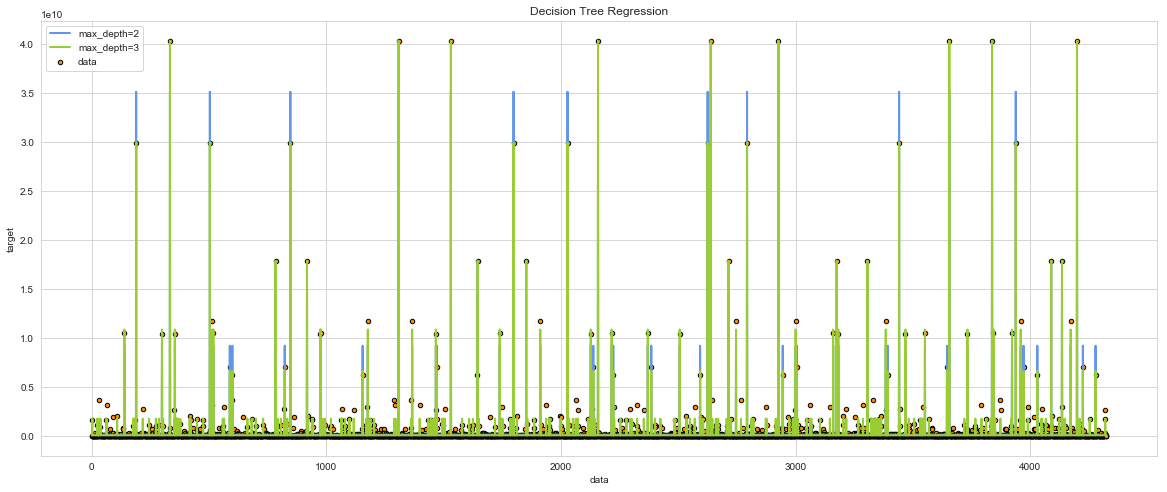

In [52]:
plt.figure(figsize=(20,8))
xx = np.linspace(0, len(X), num=len(X))
plt.scatter(xx, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(xx, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(xx, y_2, color="yellowgreen", label="max_depth=3", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [54]:
dtr1.score(X,y)

0.9527012988401523

In [55]:
dtr2.score(X,y)

0.9921555822724244